## What are some aspects of safety you could investigate? (e.g.: number of engines, flight level, time of day, weather, location, etc.)

    * Make 
    * model
    * number of engines
    * injury severity
    * total percentage uninjured
    * weather condition

## When doing your analysis, what measurement will you use to determine the safest aircraft?

newer generations are more reliable than first generations

* crash rates for models launched from late 1990s-present are lower than versions in earlier decades

* Safest airplanes (clean flight record):
     * airbus A220, A319neo, A320neo, A321neo, A340, A350, and A380
     * Boeing 717, 747-8, and 787
     * Embraer 135, 140, 145
     
     * embraer E170 and E190 have crash rate of 0.03 per million flights
     
     * crash rate, and fatality rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('AviationData.csv', encoding = 'latin-1')

/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [12]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
df['Event.Id'].value_counts()

20001212X19172    3
20001214X45071    3
20001212X18031    2
20001214X37836    2
20001213X35046    2
                 ..
20001208X06062    1
20001214X42643    1
20001208X07329    1
20001212X18753    1
20020917X05047    1
Name: Event.Id, Length: 87951, dtype: int64

In [10]:
df[df['Event.Id'] == '20001212X19172']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
46714,20001212X19172,Accident,CHI99FA266C,1999-07-29,"OSHKOSH, WI",United States,NaN,NaN,OSH,WITTMAN REGIONAL AIRPORT,...,Personal,NaN,0.0,1.0,1.0,1.0,VMC,Takeoff,Probable Cause,22-06-2000
46715,20001212X19172,Accident,CHI99FA266B,1999-07-29,"OSHKOSH, WI",United States,NaN,NaN,OSH,WITTMAN REGIONAL AIRPORT,...,Personal,NaN,0.0,1.0,1.0,1.0,VMC,Standing,Probable Cause,22-06-2000
46718,20001212X19172,Accident,CHI99FA266A,1999-07-29,"OSHKOSH, WI",United States,NaN,NaN,OSH,WITTMAN REGIONAL AIRPORT,...,Personal,NaN,0.0,1.0,1.0,1.0,VMC,Takeoff,Probable Cause,22-06-2000


In [11]:
df['Accident.Number'].value_counts()

CEN23MA034    2
DCA22LA135    2
DCA22WA214    2
ERA22FA338    2
DCA22WA130    2
             ..
ATL92LA168    1
SEA83LA107    1
ATL01LA101    1
DEN00LA001    1
ANC88LA054    1
Name: Accident.Number, Length: 88863, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [6]:
#creates new dataframe only with rows with airplanes as the aircraft
df_airplanes = df[df['Aircraft.Category'] == 'Airplane']
df_airplanes.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [7]:
df_airplanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27617 entries, 5 to 88886
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                27617 non-null  object 
 1   Investigation.Type      27617 non-null  object 
 2   Accident.Number         27617 non-null  object 
 3   Event.Date              27617 non-null  object 
 4   Location                27610 non-null  object 
 5   Country                 27610 non-null  object 
 6   Latitude                22092 non-null  object 
 7   Longitude               22083 non-null  object 
 8   Airport.Code            17773 non-null  object 
 9   Airport.Name            18256 non-null  object 
 10  Injury.Severity         26803 non-null  object 
 11  Aircraft.damage         26335 non-null  object 
 12  Aircraft.Category       27617 non-null  object 
 13  Registration.Number     27391 non-null  object 
 14  Make                    27608 non-null

In [8]:
df_airplanes['Amateur.Built'].value_counts()

No     24417
Yes     3183
Name: Amateur.Built, dtype: int64

In [9]:
make = df_airplanes['Make'].value_counts()
make

CESSNA               4867
Cessna               3608
PIPER                2805
Piper                1910
BOEING               1037
                     ... 
ROBERT GOLDING          1
LAVIA ARGENTINA         1
BREEZER AIRCRAFT        1
DAVENPORT               1
CLEVELAND ALLAN B       1
Name: Make, Length: 3874, dtype: int64

In [13]:
make_top_50 = make[:50]
make_top_50

NameError: name 'make' is not defined

In [11]:
top_50_brands = make_top_50.index
top_50_brands

Index(['CESSNA', 'Cessna', 'PIPER', 'Piper', 'BOEING', 'BEECH', 'Beech',
       'Boeing', 'MOONEY', 'CIRRUS DESIGN CORP', 'AIR TRACTOR INC', 'AIRBUS',
       'Mooney', 'Grumman', 'BELLANCA', 'AERONCA', 'MAULE', 'Air Tractor',
       'Bellanca', 'EMBRAER', 'LUSCOMBE', 'CHAMPION', 'STINSON', 'DEHAVILLAND',
       'AIR TRACTOR', 'Maule', 'Aeronca', 'CIRRUS', 'NORTH AMERICAN',
       'Champion', 'GRUMMAN', 'DIAMOND AIRCRAFT IND INC', 'AVIAT AIRCRAFT INC',
       'Luscombe', 'AERO COMMANDER', 'Vans', 'BOMBARDIER INC',
       'MCDONNELL DOUGLAS', 'SOCATA', 'TAYLORCRAFT',
       'GRUMMAN ACFT ENG COR-SCHWEIZER', 'VANS', 'Cirrus', 'Stinson',
       'De Havilland', 'RAYTHEON AIRCRAFT COMPANY', 'ROCKWELL INTERNATIONAL',
       'Mcdonnell Douglas', 'Taylorcraft', 'GRUMMAN AMERICAN AVN. CORP.'],
      dtype='object')

In [12]:
df_top_50 = df_airplanes[df_airplanes['Make'].isin(top_50_brands)]

In [13]:
df_top_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20359 entries, 5 to 88877
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                20359 non-null  object 
 1   Investigation.Type      20359 non-null  object 
 2   Accident.Number         20359 non-null  object 
 3   Event.Date              20359 non-null  object 
 4   Location                20355 non-null  object 
 5   Country                 20353 non-null  object 
 6   Latitude                15771 non-null  object 
 7   Longitude               15769 non-null  object 
 8   Airport.Code            12963 non-null  object 
 9   Airport.Name            13394 non-null  object 
 10  Injury.Severity         19665 non-null  object 
 11  Aircraft.damage         19311 non-null  object 
 12  Aircraft.Category       20359 non-null  object 
 13  Registration.Number     20189 non-null  object 
 14  Make                    20359 non-null

In [14]:
df_top_50['Investigation.Type'].value_counts()

Accident    19034
Incident     1325
Name: Investigation.Type, dtype: int64

In [15]:
df_top_50['Model'].unique()

array(['DC9', '140', '401B', ..., 'BD-700-2A12', '737-8', 'P206D'],
      dtype=object)

In [16]:
df_top_50.groupby(['Make', 'Model']).sum()

Number.of.Engines  Total.Fatal.Injuries  \
Make           Model                                                 
AERO COMMANDER 100                       7.0                   2.0   
               100 180                   1.0                   0.0   
               100-180                   3.0                   0.0   
               112                       2.0                   0.0   
               112A                      1.0                   0.0   
...                                      ...                   ...   
Vans           VANS RV-10                0.0                   0.0   
               VANS RV-12                1.0                   0.0   
               VANS RV-6                 1.0                   2.0   
               VANS RV-8                 1.0                   1.0   
               WILSON RV4                0.0                   1.0   

                           Total.Serious.Injuries  Total.Minor.Injuries  \
Make           Model                                                      
AERO COMMANDER 100                            2.0                   1.0   
               100 180                        0.0                   0.0   
               100-180                        1.0                   0.0   
               112                            0.0                   0.0   
               112A                           2.0                   0.0   
...                                           ...                   ...   
Vans           VANS RV-10                     0.0                   0.0   
               VANS RV-12                     1.0                   0.0   
               VANS RV-6                      0.0                   0.0   
               VANS RV-8                      0.0                   0.0   
               WILSON RV4                     0.0                   0.0   

                           Total.Uninjured  
Make           Model                        
AERO COMMANDER 100                     5.0  
               100 180                 1.0  
               100-180                 6.0  
               112                     2.0  
               112A                    0.0  
...                                    ...  
Vans           VANS RV-10              4.0  
               VANS RV-12              1.0  
               VANS RV-6               0.0  
               VANS RV-8               0.0  
               WILSON RV4              0.0  

[2916 rows x 5 columns]

In [17]:
df_top_50.groupby('Make')['Number.of.Engines'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
AERO COMMANDER,63.0,1.460317,0.502426,1.0,1.0,1.0,2.0,2.0
AERONCA,146.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
AIR TRACTOR,66.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
AIR TRACTOR INC,203.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
AIRBUS,133.0,2.030075,0.244325,2.0,2.0,2.0,2.0,4.0
AVIAT AIRCRAFT INC,71.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Aeronca,79.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Air Tractor,127.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
BEECH,910.0,1.374725,0.484318,1.0,1.0,1.0,2.0,2.0


In [18]:
df_top_50['Injury.Severity'].value_counts()

Non-Fatal      15646
Fatal           2878
Fatal(1)         295
Fatal(2)         237
Incident         167
Minor            116
Serious           80
Fatal(4)          73
Fatal(3)          72
Fatal(5)          24
Unavailable       17
Fatal(6)          17
Fatal(8)          12
Fatal(7)           9
Fatal(10)          6
Fatal(12)          2
Fatal(154)         1
Fatal(14)          1
Fatal(125)         1
Fatal(160)         1
Fatal(9)           1
Fatal(17)          1
Fatal(54)          1
Fatal(131)         1
Fatal(35)          1
Fatal(228)         1
Fatal(65)          1
Fatal(16)          1
Fatal(20)          1
Fatal(18)          1
Name: Injury.Severity, dtype: int64

What do these values mean? Fatal(1)? Fatal(2)? Fatal(n)?

Does the number in the parenthesis represent the number of fatalities?

To clean up this data does it make sense to categorize the injuries into 2 types of fatalities? Serious (at least 'n' number of deaths) and minor (less than 'n' number of deaths)? 

Then we have 4 categories: Non-fatal, Fatal, Minor, Serious

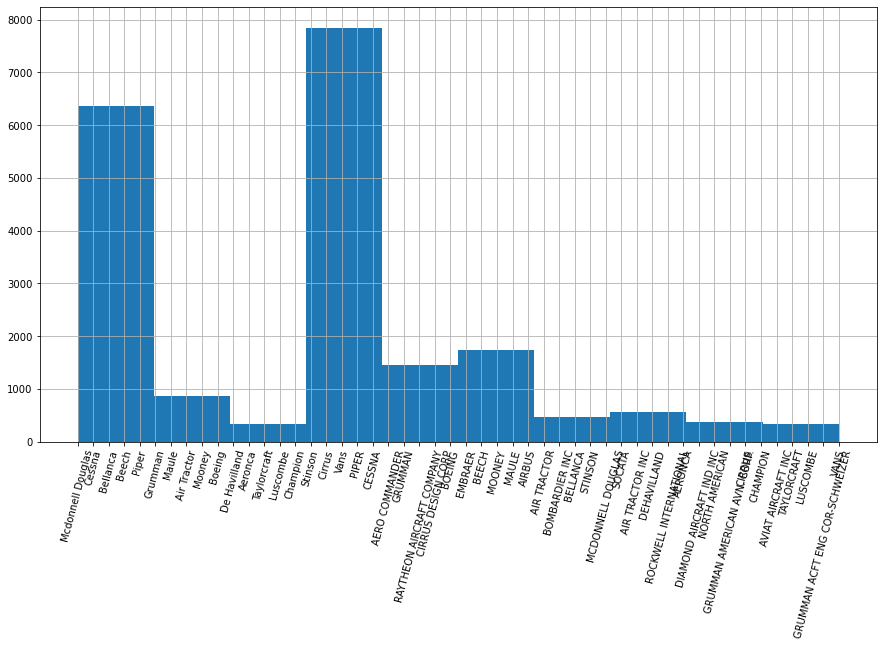

In [19]:
fig, ax = plt.subplots(figsize = (15,8))
df_top_50['Make'].hist(xrot=75);

In [20]:
df_top_50['Model'].value_counts()

172        867
152        450
737        404
182        345
172N       315
          ... 
B55          1
BE35         1
M-4C         1
737 330      1
G-164D       1
Name: Model, Length: 2155, dtype: int64

In [21]:
df_top_50['Weather.Condition'].value_counts()

VMC    16511
IMC     1156
Unk      181
UNK      133
Name: Weather.Condition, dtype: int64

Visual Meteorological Conditions (VMC): clear visibility; pilots can fly on their own b/c visibility is good 

Instrument Meteorological Conditions (IMC): pilots cannot fly on their own. Need to rely on their flight instruments; bad weather conditions

In [22]:
#Cleaning the 'Unk' and "UNK" categories to "Unknown"
df_top_50['Weather.Condition'] = df_top_50['Weather.Condition'].replace('Unk', 'Unknown')
df_top_50['Weather.Condition'] = df_top_50['Weather.Condition'].replace('UNK', 'Unknown')

<ipython-input-22-a6ab6207be90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_50['Weather.Condition'] = df_top_50['Weather.Condition'].replace('Unk', 'Unknown')
<ipython-input-22-a6ab6207be90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_50['Weather.Condition'] = df_top_50['Weather.Condition'].replace('UNK', 'Unknown')


In [23]:
df_top_50['Weather.Condition'].value_counts()

VMC        16511
IMC         1156
Unknown      314
Name: Weather.Condition, dtype: int64

In [24]:
df_top_50['Make'].value_counts()

CESSNA                            4867
Cessna                            3608
PIPER                             2805
Piper                             1910
BOEING                            1037
BEECH                             1018
Beech                              674
Boeing                             287
MOONEY                             238
CIRRUS DESIGN CORP                 218
AIR TRACTOR INC                    217
AIRBUS                             216
Mooney                             181
Grumman                            173
BELLANCA                           158
AERONCA                            149
MAULE                              144
Air Tractor                        135
Bellanca                           124
EMBRAER                            123
LUSCOMBE                            95
CHAMPION                            91
STINSON                             91
DEHAVILLAND                         91
AIR TRACTOR                         89
Maule                    